<html>
<div>
  <img src="https://www.engineersgarage.com/wp-content/uploads/2021/11/TCH36-01-scaled.jpg" width=360px width=auto style="vertical-align: middle;">
  <span style="font-family: Georgia; font-size:30px; color: white;"> <br/> University of Tehran <br/> AI_CA5 <br/> Spring 02 </span>
</div>
<span style="font-family: Georgia; font-size:15pt; color: white; vertical-align: middle;"> low_mist - std id: 810100186 </span>
</html>

In this notebook we are to learn about machine learning and try to anticipate price of houses.

## Problem Description
in this problem we will learn about basics of machine learning, in order to assign prices to houses. At first we try to do that by using linear regression without any library, and then we use Scikit-Learn to do that.

## Dataset
The `house_data.csv` file contains data about houses and their prices in one of the cities of Washington, D.C. in years 2014 and 2015. 

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from copy import deepcopy

DATASET_PATH = "assets/house_data.csv"

In [17]:
df = pd.read_csv(DATASET_PATH)
pd.set_option("display.max_columns", None)
df.head(10)

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,location,style,house_age
0,0,0,0,7129300520,20141013T000000,221900.0,3,1.00,1180.0,5650,1.0,0,0,3,7,1180,0.0,1955.0,0,98178,47.5112,-122.257,1340,5650,Suburban,Contemporary,67
1,1,1,1,6414100192,20141209T000000,538000.0,3,2.25,2570.0,7242,NaN,0,0,3,7,2170,400.0,NaN,1991,98125,47.7210,-122.319,1690,7639,Suburban,Ranch,71
2,2,2,2,5631500400,20150225T000000,180000.0,2,1.00,770.0,10000,1.0,0,0,3,6,770,0.0,1933.0,0,98028,47.7379,-122.233,2720,8062,Rural,Victorian,89
3,3,3,3,2487200875,20141209T000000,604000.0,4,3.00,1960.0,5000,1.0,0,0,5,7,1050,910.0,1965.0,0,98136,47.5208,-122.393,1360,5000,Urban,Colonial,57
4,4,4,4,1954400510,20150218T000000,510000.0,3,2.00,1680.0,8080,1.0,0,0,3,8,1680,0.0,1987.0,0,98074,47.6168,-122.045,1800,7503,Suburban,Cape Cod,35
5,5,5,5,7237550310,20140512T000000,1230000.0,4,4.50,5420.0,101930,1.0,0,0,3,11,3890,1530.0,2001.0,0,98053,47.6561,-122.005,4760,101930,Urban,Colonial,21
6,6,6,6,1321400060,20140627T000000,257500.0,3,2.25,1715.0,6819,2.0,0,0,3,7,1715,0.0,1995.0,0,98003,47.3097,-122.327,2238,6819,Urban,Ranch,27
7,7,7,7,2008000270,20150115T000000,291850.0,3,1.50,1060.0,9711,NaN,0,0,3,7,1060,0.0,NaN,0,98198,47.4095,-122.315,1650,9711,Rural,Ranch,59
8,8,8,8,2414600126,20150415T000000,229500.0,3,1.00,NaN,7470,1.0,0,0,3,7,1050,730.0,1960.0,0,98146,47.5123,-122.337,1780,8113,Rural,Ranch,62
9,9,9,9,3793500160,20150312T000000,323000.0,3,2.50,NaN,6560,2.0,0,0,3,7,1890,0.0,2003.0,0,98038,47.3684,-122.031,2390,7570,Urban,Ranch,19


## Part1. Analysis of datasets
### Q1. Describe dataset using info and describe methods.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0.2   21613 non-null  int64  
 1   Unnamed: 0.1   21613 non-null  int64  
 2   Unnamed: 0     21613 non-null  int64  
 3   id             21613 non-null  int64  
 4   date           21613 non-null  object 
 5   price          21613 non-null  float64
 6   bedrooms       21613 non-null  int64  
 7   bathrooms      21613 non-null  float64
 8   sqft_living    18528 non-null  float64
 9   sqft_lot       21613 non-null  int64  
 10  floors         18530 non-null  float64
 11  waterfront     21613 non-null  int64  
 12  view           21613 non-null  int64  
 13  condition      21613 non-null  int64  
 14  grade          21613 non-null  int64  
 15  sqft_above     21613 non-null  int64  
 16  sqft_basement  21184 non-null  float64
 17  yr_built       18531 non-null  float64
 18  yr_ren

The `info` method returns general info about the dataframe, its data, and the data types.

The panda's dataframe's is printed and we can see that there are 21613 entries in the dataframe.  
There are 26 columns and for each of them, the column's name, its data types, and the non-null count is shown.  
Non-null count shows how many rows have a value in a specific column.  
At the end, the count of each data type among the columns and the structure's memory usage is shown.

In [19]:
df.describe()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,house_age
count,21613.00000,21613.00000,21613.00000,2.161300e+04,2.161300e+04,21613.000000,21613.000000,18528.000000,2.161300e+04,18530.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21184.000000,18531.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,10806.00000,10806.00000,4.580302e+09,5.401822e+05,3.367464,2.111900,2077.569031,1.510697e+04,1.492903,0.007542,0.234303,3.409430,7.645722,1788.390691,292.121082,1970.896714,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,50.994864
std,6239.28002,6239.28002,6239.28002,2.876566e+09,3.673622e+05,0.943028,0.780697,953.971679,4.142051e+04,0.538562,0.086517,0.766318,0.650743,2.020809,828.090978,442.637777,29.406420,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,29.373411
min,0.00000,0.00000,0.00000,1.000102e+06,7.500000e+04,-5.000000,-5.000000,-33323.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,-234.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.000000
25%,5403.00000,5403.00000,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,25.000000
50%,10806.00000,10806.00000,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,47.000000
75%,16209.00000,16209.00000,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1996.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,71.000000
max,21612.00000,21612.00000,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,122.000000


The `describe` method shows some statistical information about the dataframe.

Each table row reports a property of the corresponding column's data:  

- count: The number of the data.
- mean: The average of the data.
- std: The standard deviation of the data.
- min: The minimum data.
- 25%: The first quartile of the column's data.
- 50%: The median of the column's data.
- 75%: The third quartile of the column's data.
- max: The maximum data.

### Q2. For each feature show number and proportion of missing values.

In [20]:
def missing_values(df: pd.DataFrame) -> pd.DataFrame:
    nan_values_count = df.isna().sum()
    nan_values_percent = nan_values_count / len(df)
    nan_values = pd.concat(
        [nan_values_count, nan_values_percent], axis=1, keys=["Missing", "Percentage"]
    )
    return nan_values[nan_values["Missing"] != 0]


missing_values(df)

,Missing,Percentage
sqft_living,3085,0.142738
floors,3083,0.142646
sqft_basement,429,0.019849
yr_built,3082,0.142599


### Q3. Plotting the correlation graph between the features. Which features are most correlated with target?

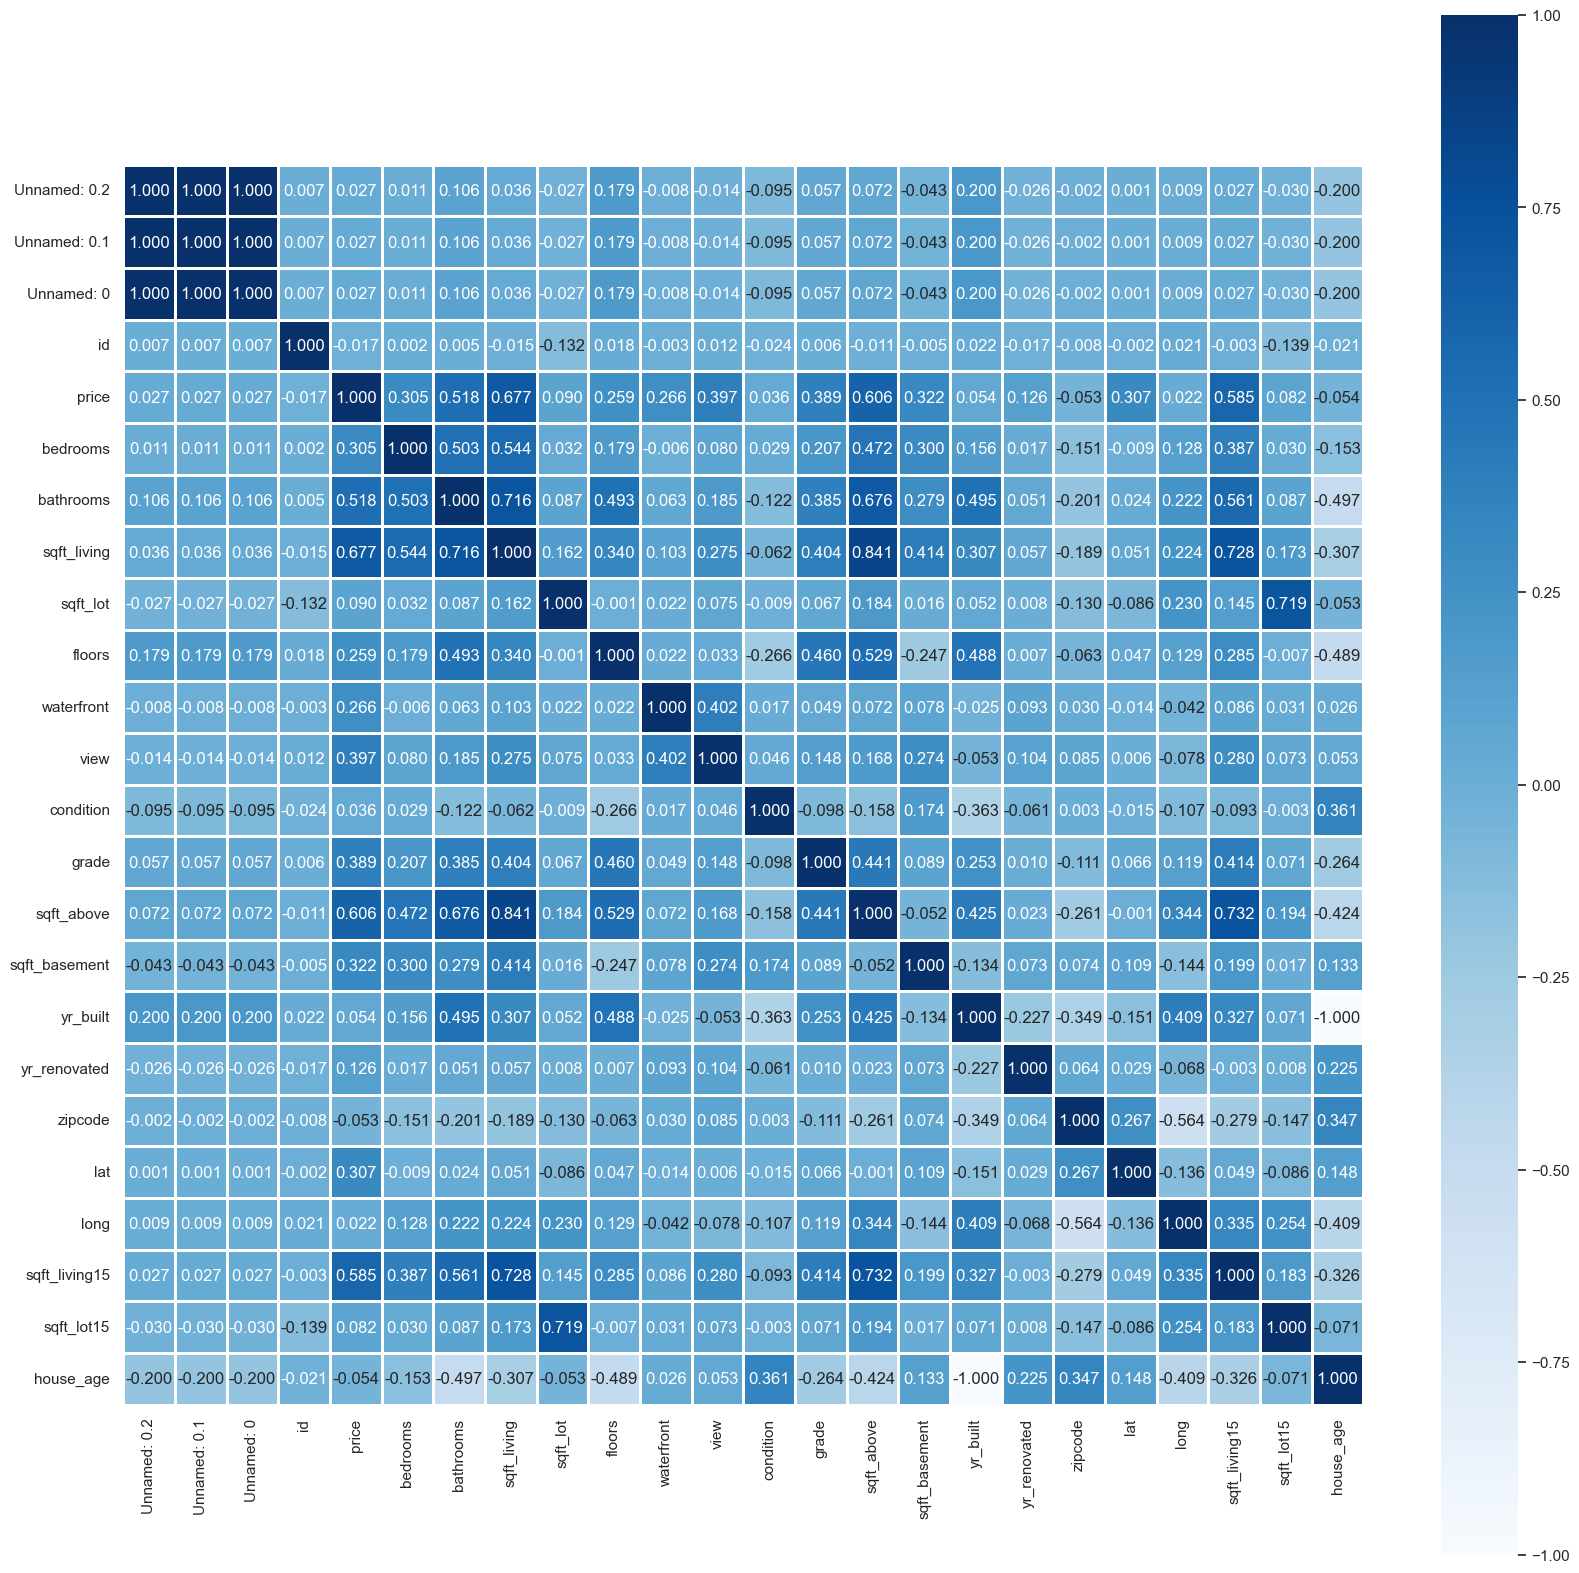

In [21]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".3f", cmap="Blues", linewidths=1, square=True)
plt.show()


To see what features have the most correlation with the outcome, we can simply use the price row in `df.corr()`.

In [22]:
price_corr = df.corr(numeric_only=True)["price"].drop("price")
price_corr = price_corr[abs(price_corr) > 0.35].sort_values(ascending=False)
display(price_corr)

sqft_living      0.676542
sqft_above       0.605566
sqft_living15    0.585374
bathrooms        0.517952
view             0.397346
grade            0.389227
Name: price, dtype: float64

As we can see, square foot-related features namely `sqft_living`, `sqft_above` and `sqft_living15`, has the most correlation with the outcome.

### Q4. Plot unique values for each feature of last part.

sqft_living


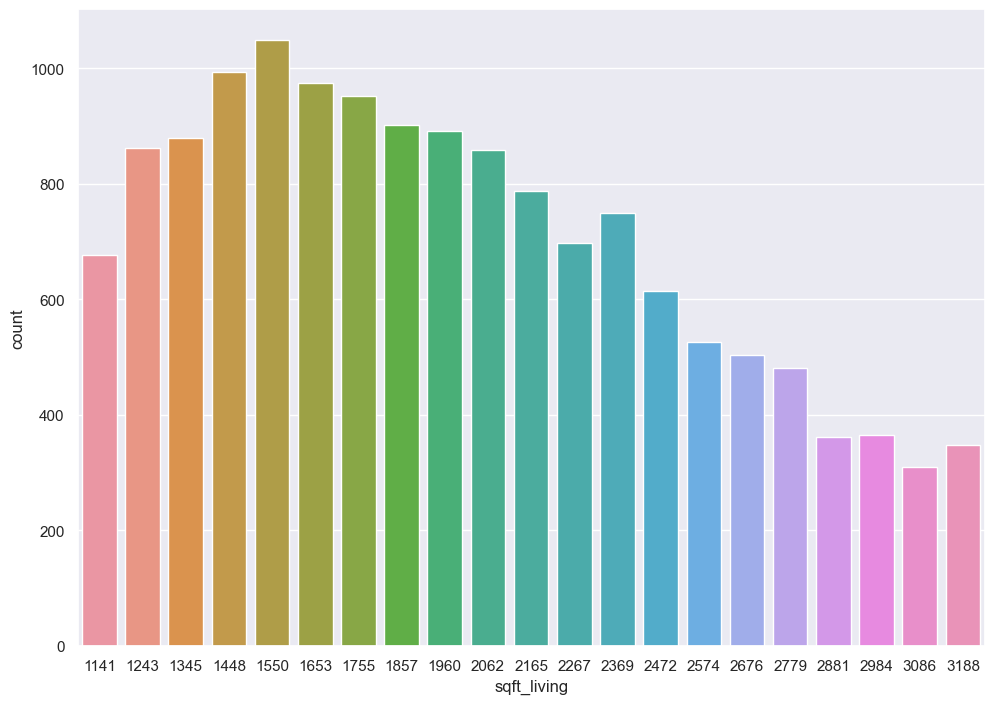

sqft_above


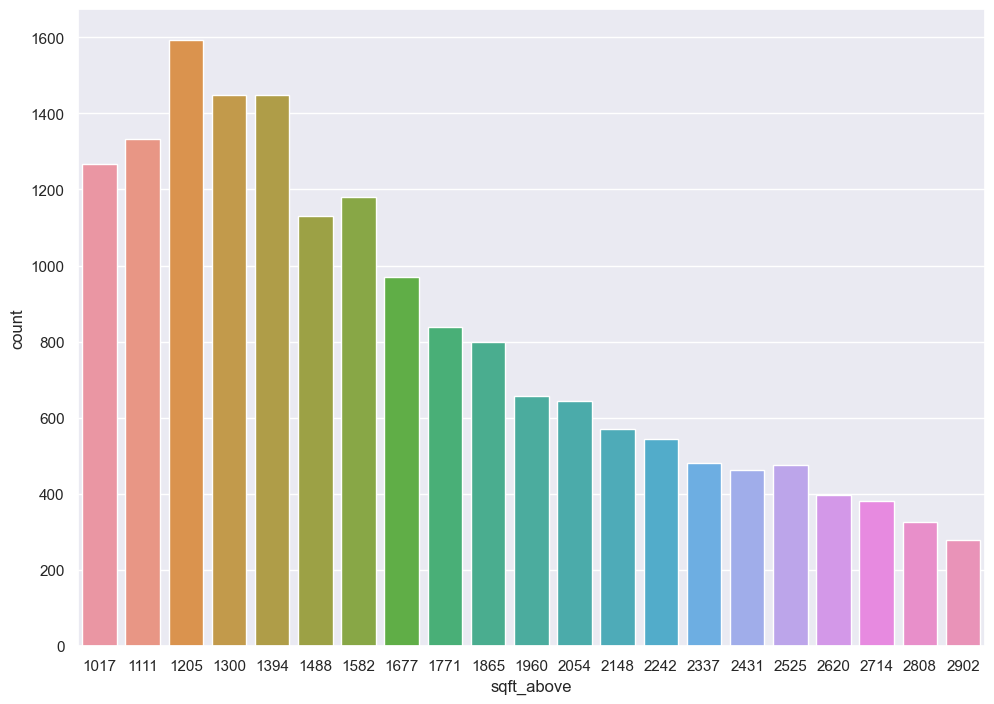

sqft_living15


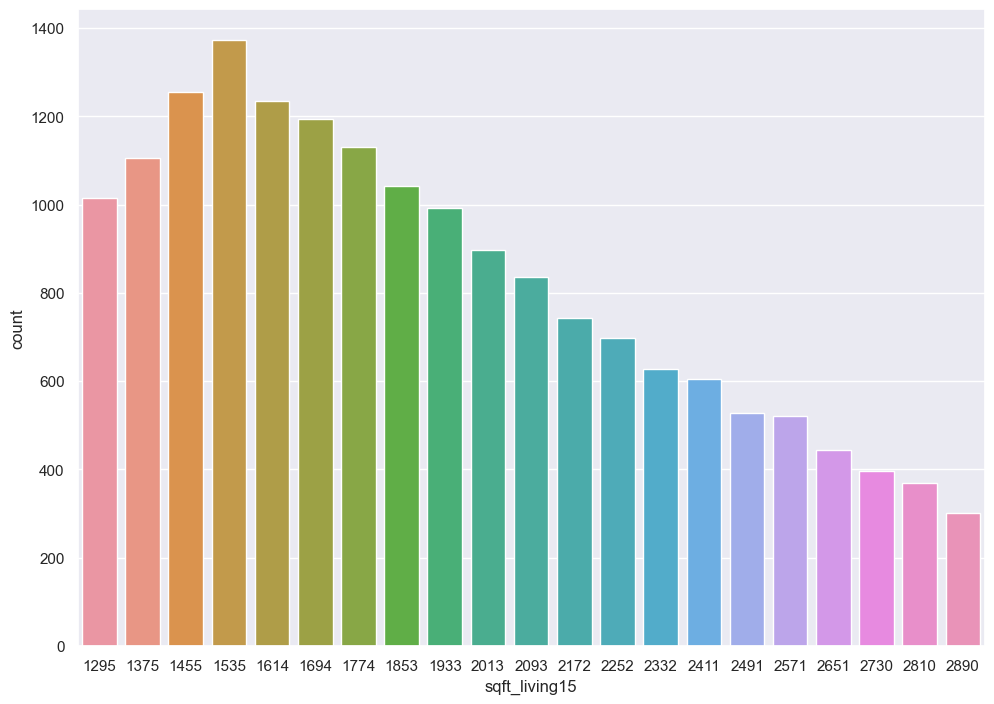

bathrooms


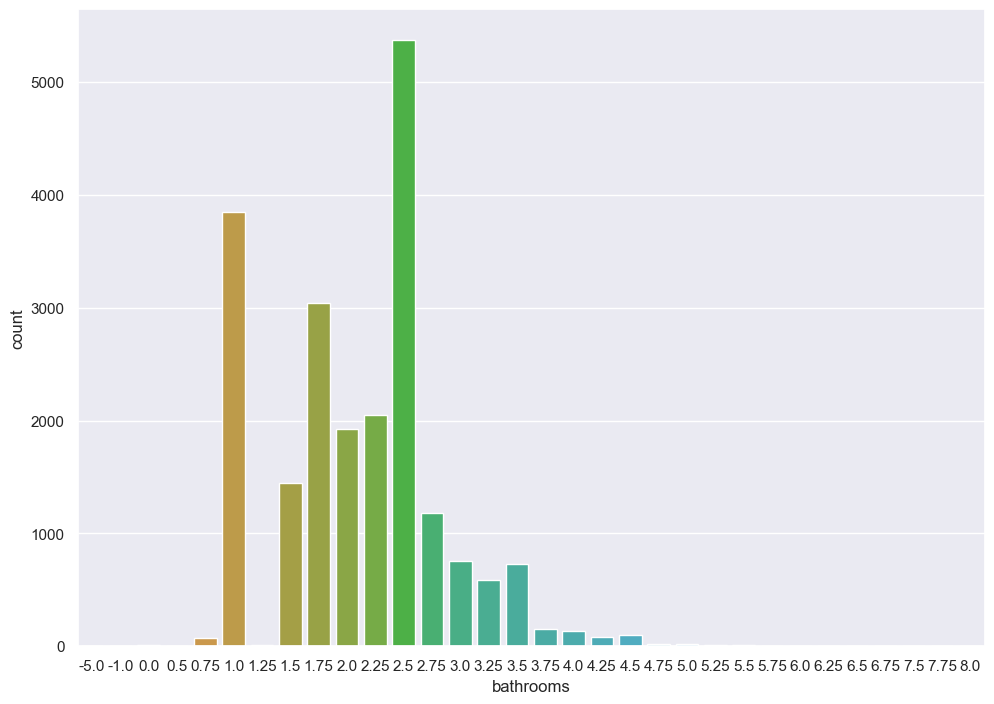

view


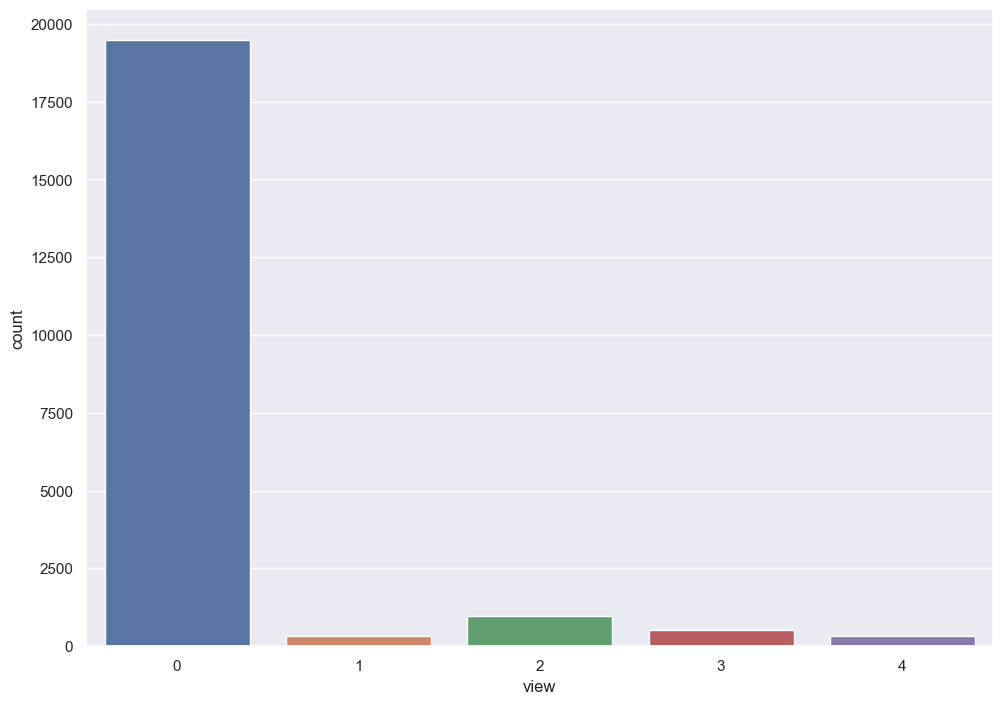

grade


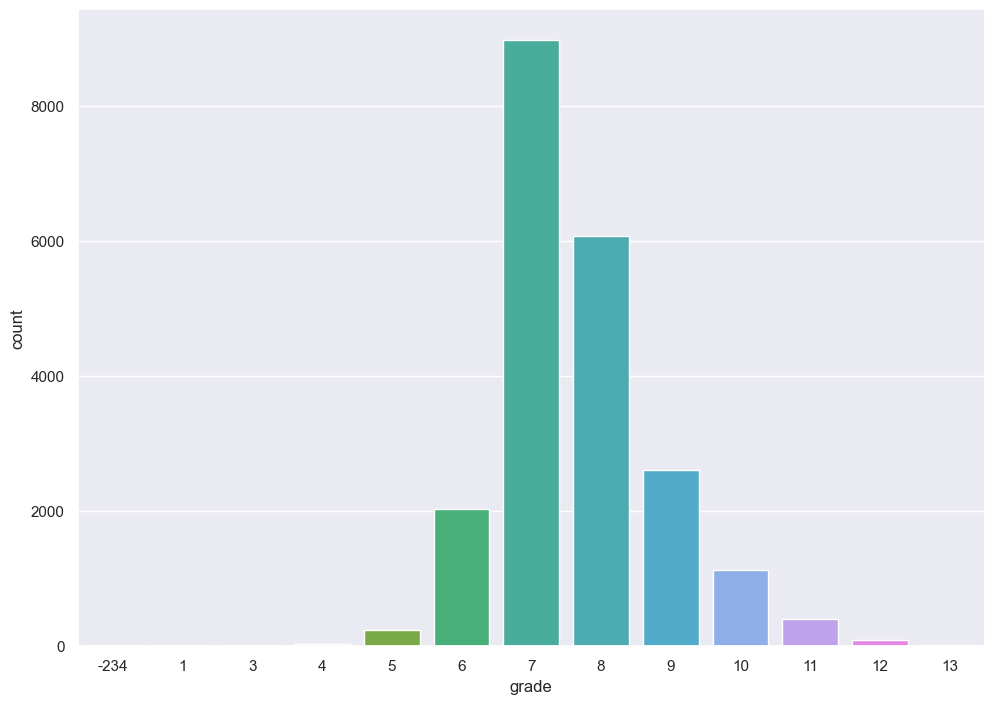

In [23]:
NUM_OF_INTERVALS = 20
df_backup = deepcopy(df)

sns.set(rc={'figure.figsize':(11.7,8.27)})

for col in price_corr.index.to_list():
    print(col)
    if df[col].quantile(0.9) - df[col].quantile(0.1) < 20:
        sns.countplot(x=col, data=df)
        plt.show()
    else:
        intervals = pd.interval_range(start=df[col].quantile(0.1), end=df[col].quantile(0.9), periods=NUM_OF_INTERVALS + 1)
        interval_tuples = [(interval.left, interval.right) for interval in intervals]
        bins = pd.IntervalIndex.from_tuples(interval_tuples)
        df[col] = pd.cut(df[col], bins)
        ax = sns.countplot(x=col, data=df)
        ax.set_xticklabels([f'{int(np.mean(interval))}' for interval in interval_tuples])
        plt.show()


## Linear Regression
Main form of simple linear regression function: 
$$f(x) = \alpha x + \beta$$

here we want to find the intercept($\alpha$) and slope($\beta$) by minimizing the derivation of the RSS function:

- step 1: Compute RSS of the training data  

$$ RSS = \Sigma (y_i - (\hat{\beta} + \hat{\alpha} * x_i) )^2 $$

- step 2: Compute the derivatives of the RSS function in term of $\underline{\alpha}$ and $\underline{\beta}$, and set them equal to 0 to find the desired parameters

$$ \frac{\partial RSS}{\partial \beta} = \Sigma (-f(x_i) + \hat{\beta} + \hat{\alpha} * x_i) = 0$$
$$ \to \hat{\beta} = \hat{y} - \hat{\alpha} \hat{x} \to (1)$$


$$ \frac{\partial RSS}{\partial \alpha} = \Sigma (-2 x_i y_i + 2 \hat{\beta} x_i + 2\hat{\alpha} x_i ^ 2) = 0 \to (2)$$

$$ (1) , (2) \to \hat{\alpha} = \frac{\Sigma{(x_i - \hat{x})(y_i - \hat{y})}}{\Sigma{(x_i - \hat{x})^2}}
$$ 
$$ \hat{\beta} = \hat{y} - \hat{\alpha} \hat{x}$$



Based on the formula above, complete this function to compute the parameters of a simple linear regression

In [25]:
def simple_linear_regression(input_feature, output):
    # TO DO:

    # compute the sum of input_feature and output

    # compute the product of the output and the input_feature and its sum

    # compute the squared value of the input_feature and its sum

    # use the formula for the slope

    # use the formula for the intercept

    return (intercept, slope)

Now complete this function to predict the value of given data based on the calculated intercept and slope

In [26]:
def get_regression_predictions(input_feature, intercept, slope):
    # TO DO:

    # calculate the predicted values:

    return predicted_values

Now that we have a model and can make predictions let's evaluate our model using Root Mean Square Error (RSME). RMSE is the square root of the mean of the squared differences between the residuals and the residuals is just a fancy word for the difference between the predicted output and the true output.

Complete the following function to compute the RSME of a simple linear regression model given the input_feature, output, intercept and slope:

In [27]:
def get_root_mean_square_error(predicted_values, output):
    # TO DO:

    # Compute the residuals (since we are squaring it doesn't matter which order you subtract)

    # square the residuals and add them up

    # find the mean of the above phrase

    # calculate the root

    return RMSE

AS you might guessed, the RMSE has no bound and it is not easy to find out the percentage of fitting the model into data with it. instead, we use R2 score. The R2 score is calculated by comparing the sum of the squared differences between the actual and predicted values of the dependent variable to the total sum of squared differences between the actual and mean values of the dependent variable. Matematically, the R2 score formula is shown as follows:

$$R^2 = 1 - \frac{SSres}{SStot} = 1 - \frac{\sum_{i=1}^{n} (y_{i,true} - y_{i,pred})^2}{\sum_{i=1}^{n} (y_{i,true} - \bar{y}_{true})^2} $$

In this step, complete the following function to calculate the R2 score of a given input_feature, output, intercept, and slope:

In [28]:
def get_r2_score(predicted_values, output):
    # TO DO:

    # then compute the residuals (since we are squaring it doesn't matter which order you subtract)

    # square the residuals and add them up -> SSres

    # compute the SStot

    # compute the R2 score value

    return R2_score

Now calculate the fitness of the model and explain the outputs

In [29]:
# TO DO:

designated_feature_list = ["sqft_living", "yr_built", "grade", "zipcode"]

for feature in designated_feature_list:
    # TO DO: calculate R2 score and RMSE for each given feature
    pass